# <span style = "color:royalblue"><center>Medidas de dispersión</center></span>

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

[Quartiles](https://support.minitab.com/es-mx/minitab/21/help-and-how-to/graphs/boxplot/interpret-the-results/quartiles/)

Estas medidas son complementarias a las medidas de tendencia central aunque como es posible evidenciar, es posible definir los cuartiles como una medida de tendencia central en el sentido de que estrictamente hablando, el Q1 es la mediana de la primera mitad de los datos, el Q2 la mediana de todo el espacio muestral y el Q3 la mediana de la segunda mitad de los datos. Aunque en sí mismos los cuartiles son medidas de dispersión. 
1. Rango: El existente entre el máximo y mínimo real contando los datos anómalos
2. Rango intercuartil: también llamado $IQR$ la distancia entre el Q1 y el Q3
Recordar que:


$Q1$ Equivale a que el 25% de los datos es menor o igual a ese valor


$Q2$ es la mediana


$Q3$ Equivale a que el 75% de los datos es menor o igual a éste valor


## La medida de dispersión más frecuentemente utilziada es la desviación estándar que a su vez está relacionada con la varianza.

$Var =$ $\sigma^2$ $= \sum_{i=1}^{n}(Xi - promedio)^2$

$Desv =$ $\sigma =$  $\sum_{i=1}^{n}\sqrt{(Xi - promedio)^2}$


## OJO

Hay desviaciones estándar que son muestrales y otras poblacionales. Estas usualmente son representadas como $\sigma$ $sample$


### <span style="color:royalblue"><center>Acerca de las Distribuciones de tipo Normal</center></span>

Algo importante de las campanas de Gauss es que la media y la mediana son exactamente el mismo valor. Es decir, cuando los datos tiendan a estar alineados de esa forma, se comportan normalmente. Este punto máximo de la campana de Gauss que balancea perfectamente los $Q1$ y $Q3$ deja el espacio para que los datos outliers salgan en distribuciones alejadas de la campana de Gauss.
En una distribución normal se dice admeás que el espectro que cubre más del 99% de los datos está contenido por:

$\mu$ - $3 \sigma$           y           $\mu$ + $3 \sigma$


En donde en la mitad estaría justamente la media y la mediana, $\mu$

### <span style="color:royalblue"><center>La fórmula de los Outliers</center></span>
Para cualquier distirbución de tipo normal se cumple que:

$min = Q1 - 1.5 IQR$

$max = Q3 + 1.5 IQR$

Son los determinantes mínimos y máximos respectivamente para determinar los outliers. El 1.5 es un valor que coincide con contemplar justamente el 99.72%, casi todos los datos.


## <span style="color:royalblue"><center>¿Qué pasa cuando no es gaussiana?</center></span>
Se modifica la fórmula del $IQR$ para la determinación de outliers:

$min = Q1 - f * 1.5 IQR$

$max = Q3 + g * 1.5 IQR$

En donde $f$ y $g$ son funciones aplicables que van a ayudar a corregir el sesgo, la asimetría y las colas cortas y largas que tengan.

In [9]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cars.csv')

In [10]:
# Desviación estandar
df['price_usd'].std()

6428.1520182029035

In [11]:
# Rango = valor max - valor min
rango = df['price_usd'].max() - df['price_usd'].min()
rango

49999.0

In [19]:
# Quartiles
median = df['price_usd'].median()
Q1 = df['price_usd'].quantile(q=0.25)
Q3 = df['price_usd'].quantile(q=0.75)
min_val = df['price_usd'].min()
max_val = df['price_usd'].max()
"""
Otra forma de poner los max y min values es:
MINIMO = df['price_usd'].quantile(q=0)
MAXIMO = df['price_usd'].quantile(q=1)
Porque estadísticamente es equivalente a los cuartiles 0 y 1.
"""
print('Valor mínimo=',min_val,'\nQ1 = ', Q1,'\nQ2 = ', median,
      '\nQ3 = ', Q3,'\nValor máximo=',max_val)

Valor mínimo= 1.0 
Q1 =  2100.0 
Q2 =  4800.0 
Q3 =  8990.0 
Valor máximo= 50000.0


In [20]:
#El IQR:
iqr = Q3 - Q1
iqr

6890.0

### Límites para detección de outliers (datos simetricamente distribuidos)

Datos entre $$Q_1 -1.5 \times \text{IQR}$$ y $$Q_3 + 1.5 \times \text{IQR}$$

In [23]:
"""
Ojo que acá no tiene sentido el valor negativo. Se está hablando de valores positivos en dólares.
El hecho es que sucede porque el IQR es muy alto y sobrepasa el valor del Q1.
La validez es nula.
"""
minlimit = Q1 - 1.5*iqr
maxlimit = Q3 + 1.5*iqr
print('rango para detección de outliers: {}, {}'.format(minlimit, maxlimit))

rango para detección de outliers: -8235.0, 19325.0


[Text(0.5, 0, '')]

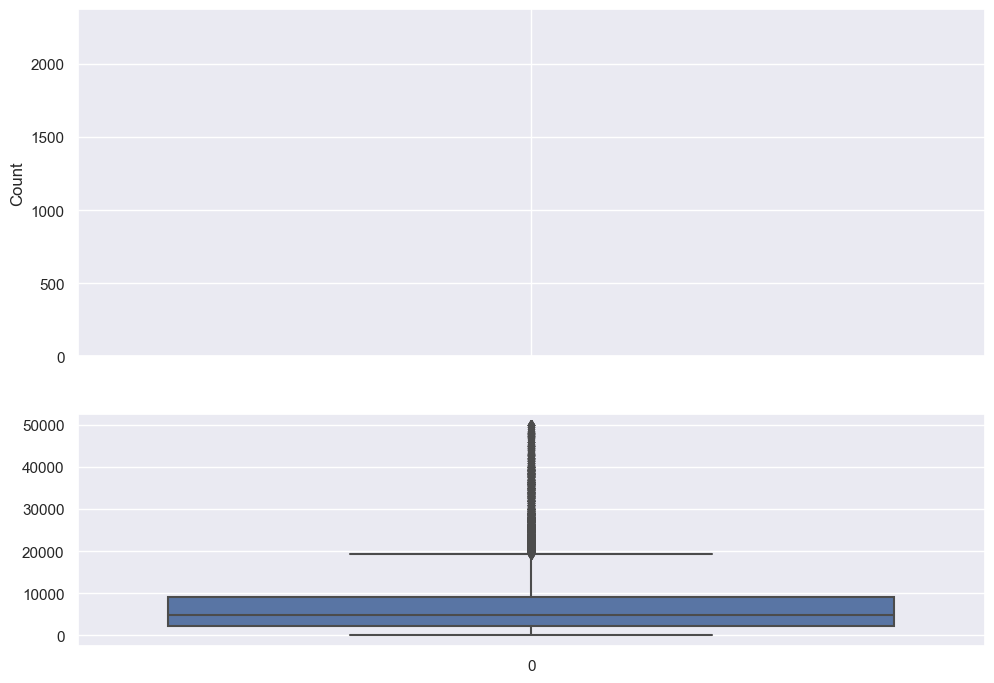

In [7]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
f, (ax_hist, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.6, .4)})
sns.histplot(df['price_usd'], ax=ax_hist)
sns.boxplot(df['price_usd'], ax=ax_box)
ax_hist.set(xlabel='')

Es posible calcular varios box-plot separando por una cierta variable categórica:

<AxesSubplot: xlabel='engine_fuel', ylabel='price_usd'>

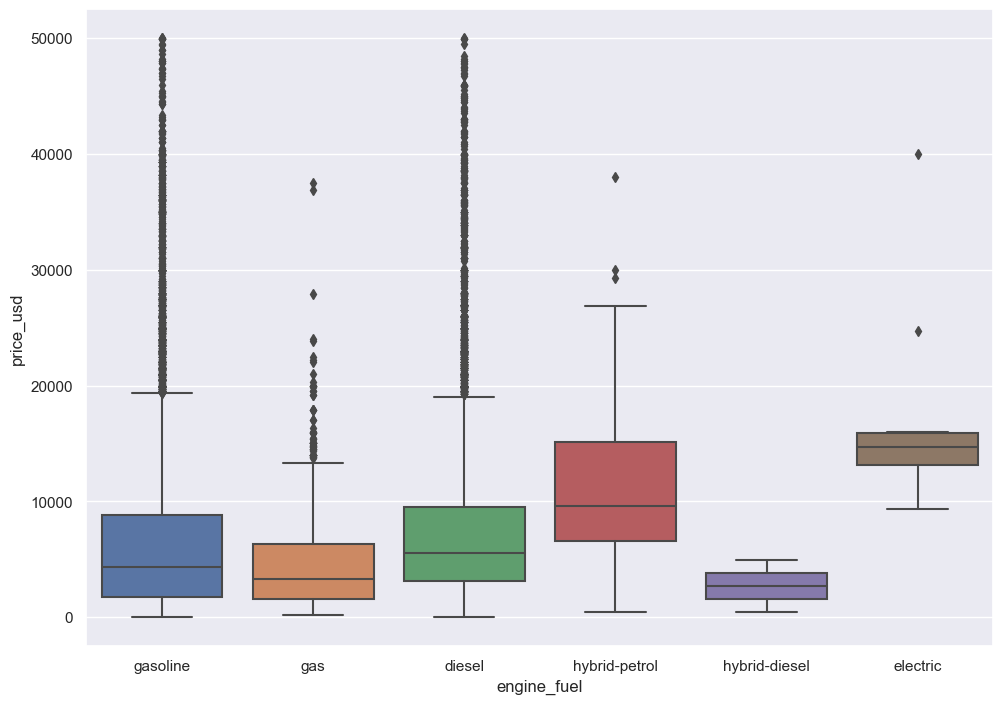

In [8]:
sns.boxplot(x = 'engine_fuel', y = 'price_usd', data = df)